In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [41]:
# Load our dataset.
df = pd.read_csv("Classified Data2.csv")

In [42]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. So we need to standardize all of our variables into a certain scale.

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
# Instantiate an object of standard scalar.
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

In [45]:
# Compute the mean and std to be used for later scaling, use all the features but the target variable.
# use axis = 1 so that for each column standardize all of it's row values.
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
# Outputs a nested numpy array containing all the standardized columns.
# Each element of the array consists of a row of standardized values for each feature.
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [47]:
# 1st scaled row.
scaled_features[0]

array([ 1.56852168, -0.44343461,  1.61980773, -0.9582548 , -1.12848137,
        0.13833575,  0.98049313, -0.93279392,  1.00831307, -1.06962723])

In [48]:
# Standrdized features dataframe.
# all columns but the last one.
df_stand = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_stand.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [49]:
df_stand.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.019807e-17,1.740830e-16,4.263256e-17,1.438849e-16,-1.589839e-16,-2.788880e-16,-1.687539e-16,-7.815970e-17,-5.115908e-16,1.776357e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.788339e+00,-2.474303e+00,-2.340083e+00,-3.409927e+00,-2.668575e+00,-3.087121e+00,-2.555607e+00,-2.215822e+00,-2.648319e+00,-2.503543e+00
25%,-7.757873e-01,-7.574735e-01,-7.293713e-01,-6.538711e-01,-6.936419e-01,-6.718168e-01,-7.168625e-01,-7.266069e-01,-7.136450e-01,-6.921254e-01
50%,-2.472083e-02,-3.442255e-02,-1.072910e-02,3.566665e-02,-3.590482e-03,2.911148e-02,8.155695e-03,-8.463946e-02,2.489807e-02,-1.931429e-02
75%,7.308466e-01,7.235137e-01,7.215308e-01,7.386505e-01,6.998930e-01,6.919471e-01,7.032086e-01,6.650219e-01,6.978394e-01,7.253420e-01
max,2.863927e+00,3.009948e+00,2.579241e+00,2.451642e+00,2.465393e+00,2.518753e+00,2.732696e+00,3.198000e+00,3.060964e+00,2.881896e+00


# Building KNN Model


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Could also use the df_stand as X
X_train, X_test, y_train, y_test = train_test_split(df_stand,df['TARGET CLASS'],
                                                    test_size=0.30, random_state=101)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# A knn model that classifies each test subject depending on it's 1st nearest neighbour.
knn = KNeighborsClassifier(n_neighbors=1)

In [54]:
# Training our model, on the training set.
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [55]:
# Predicting answers of the test datasets.
pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
# We predicted 216 correctly and 84 wrongly.
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


Precision is the ability of a classifier not to label an instance positive that is actually negative. Precision = TP/(TP + FP)

Recall is the ability of a classifier to find all positive instances Recall = TP/(TP+FN) Fraction of positives that were correctly identified.

The F1 score is the mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing the best K-Value for the knn model.

This is not the best way to do it we can do it using gridsearchCV

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
scores = []

# for k values from 1 to 39.
for i in range(1,40):
    # Try the train and predicting operation for all k-values.
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    # For every k-value get the accuracy_score of ur predictions and add it to the scores array.
    scores.append(accuracy_score(y_test, pred_i))


In [61]:
# Get the index(k-value) of the max accuracy score in ur scores array.
best_k_value = scores.index(max(scores))

Text(0, 0.5, 'Accuracy Scores')

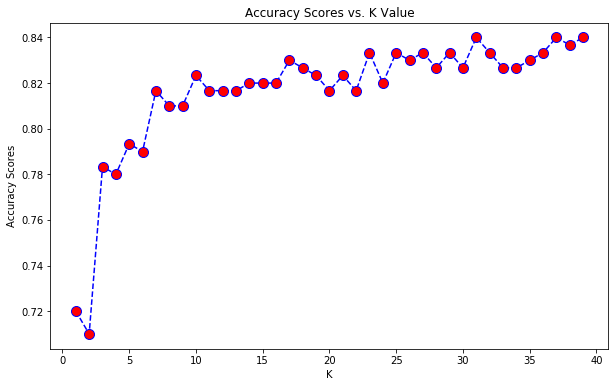

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Scores')

# Comparing the K-Values

Precision is the ability of a classifier not to label an instance positive that is actually negative. Precision = TP/(TP + FP)

Recall is the ability of a classifier to find all positive instances Recall = TP/(TP+FN) Fraction of positives that were correctly identified.

The F1 score is the mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

In [63]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')

# 216 predicted correctly, 84 predicted wrongly.
print(confusion_matrix(y_test,pred))
print('\n')

print(classification_report(y_test,pred))

WITH K=1


[[109  43]
 [ 41 107]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [64]:
# NOW WITH K=best value
knn = KNeighborsClassifier(n_neighbors=best_k_value)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K= ' + str(best_k_value))
print('\n')

# 248 predicted correctly, 52 predicted wrongly.
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K= 30


[[124  28]
 [ 24 124]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

